In [ ]:
from google.colab import  drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
cd '/content/drive/My Drive/Colab Notebooks/Token_VietNam'

/content/drive/My Drive/Colab Notebooks/Token_VietNam


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
folder_csv ='/content/drive/My Drive/Colab Notebooks/Token_VietNam/Foody.csv'
with open(folder_csv,'r') as f:
  df = pd.read_csv(f)

In [ ]:
folder_test = '/content/drive/My Drive/Colab Notebooks/Token_VietNam/Foody_test.csv'
with open(folder_test,'r') as f:
  df_test = pd.read_csv(f)

In [ ]:
df_test.head

<bound method NDFrame.head of       Unnamed: 0                                                  0  1
0              0  Vừa được ngắm " nghệ_nhân " làm quẩy vừa được ...  1
1              1  Đồ_ăn hợp mồm mình nhưng khoản chờ_đợi hơi lâu...  1
2              2  Thích món nhật lắm nên ăn thử . Giá_cả ok . đồ...  1
3              3  Đồ uống ko có gì đặc_sắc , ko ngon bằng nơi kh...  1
4              4  Ở đây có bán phở và bò kho đều ngon , dụng_cụ ...  1
...          ...                                                ... ..
9995        9995  Bên này bán hàng chán kinh_khủng , ib qua Fb t...  0
9996        9996  Kem trà xanh ngon đúng chất , chỉ có bánh trà ...  0
9997        9997  Chưa bao_giờ ăn quán nào dở như quán này hắn x...  0
9998        9998  Hôm_nay 21/4/2016 , khoảng 14h35 mình cùng bốn...  0
9999        9999  Kem xôi dư ̀ a ngon .\nGo ̉ i ba khi ́ a ngon ...  0

[10000 rows x 3 columns]>

In [ ]:
dataRaw = df[['review','sentiment']]
data_review =dataRaw['review'].to_numpy()
data_sentiment = dataRaw['sentiment'].to_numpy()

In [ ]:
valid_review = df_test['0'].to_numpy()
valid_sentiment = df_test['1'].to_numpy()

In [ ]:
train_sentence = np.copy(data_review)
train_labels =  np.copy(data_sentiment)

valid_sentence = np.copy(valid_review)
valid_lables = np.copy(valid_sentiment)

In [ ]:
print('len train sentence',len(train_sentence))
print('len train labels', len(train_labels))

print('len valid sentence',len(valid_sentence))
print('len valid labels',len(valid_sentiment))


len train sentence 21084
len train labels 21084
len valid sentence 10000
len valid labels 10000


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
vocab_size = 10000

In [ ]:
# !pip3 install vncorenlp

In [ ]:
# from vncorenlp import VnCoreNLP

In [ ]:
# !mkdir -p vncorenlp/models/wordsegmenter
# !wget https://github.com/vncorenlp/VnCoreNLP/raw/master/VnCoreNLP-1.1.1.jar
# !wget https://github.com/vncorenlp/VnCoreNLP/raw/master/models/wordsegmenter/vi-vocab
# !wget https://github.com/vncorenlp/VnCoreNLP/blob/master/models/wordsegmenter/wordsegmenter.rdr
# !mv VnCoreNLP-1.1.1.jar vncorenlp/ 
# !mv vi-vocab vncorenlp/models/wordsegmenter/
# !mv wordsegmenter.rdr vncorenlp/models/wordsegmenter/

In [ ]:
# rdrsegmenter = VnCoreNLP("/content/drive/My Drive/Colab Notebooks/Token_VietNam/vncorenlp/VnCoreNLP-1.1.1.jar", annotators="wseg", max_heap_size='-Xmx2g') 

# # Input 
# text = "Ông Nguyễn Khắc Chúc  đang làm việc tại Đại học Quốc gia Hà Nội. Bà Lan, vợ ông Chúc, cũng làm việc tại đây."

# # To perform word segmentation only
# word_segmented_text = rdrsegmenter.tokenize(text) 
# print(word_segmented_text)

In [ ]:
# ## https://pythonawesome.com/pre-trained-language-models-for-vietnamese/

In [ ]:
tokenizer = Tokenizer(num_words=vocab_size,filters='"#$%&()*+,-:;<=>[]`{|}~\n',oov_token="<OOV>")

In [ ]:
tokenizer.fit_on_texts(train_sentence)

In [ ]:
tokenizer.index_word

{1: '<OOV>',
 2: '.',
 3: 'mình',
 4: 'ăn',
 5: 'có',
 6: 'thì',
 7: 'là',
 8: 'quán',
 9: 'không',
 10: '́',
 11: 'và',
 12: 'cũng',
 13: '̀',
 14: 'ngon',
 15: 'nhưng',
 16: 'ko',
 17: 'mà',
 18: 'nên',
 19: '1',
 20: 'đi',
 21: 'rất',
 22: 'món',
 23: 'thấy',
 24: 'đây',
 25: 'lại',
 26: 'ở',
 27: 'nhân_viên',
 28: 'được',
 29: '̣',
 30: 'cho',
 31: 'với',
 32: 'ra',
 33: '!',
 34: 'lần',
 35: 'đến',
 36: 'bạn',
 37: 'này',
 38: '2',
 39: 'quá',
 40: 'còn',
 41: 'phục_vụ',
 42: 'khá',
 43: 'như',
 44: 'uống',
 45: 'vào',
 46: 'cái',
 47: 'k',
 48: 'nhiều',
 49: 'gọi',
 50: 'hơi',
 51: 'mới',
 52: 'của',
 53: 'khách',
 54: 'rồi',
 55: 'i',
 56: 'phải',
 57: 'n',
 58: 'giá',
 59: 'gì',
 60: 'bánh',
 61: 'chỉ',
 62: 'đó',
 63: 'trong',
 64: 'vì',
 65: 'lắm',
 66: 'luôn',
 67: 'để',
 68: '...',
 69: 'người',
 70: '̉',
 71: 'nữa',
 72: 'nước',
 73: 'ng',
 74: 'nói',
 75: 'khi',
 76: 'các',
 77: 'hơn',
 78: 'ngồi',
 79: 'trà',
 80: 'lúc',
 81: 'về',
 82: 'hết',
 83: 'mấy',
 84: 'không_gia

In [ ]:
 train_sequences = tokenizer.texts_to_sequences(train_sentence)
 test_sequences = tokenizer.texts_to_sequences(valid_sentence)

In [ ]:
max_length = 240 
padded_train_sequences= pad_sequences(train_sequences,
                                      maxlen= max_length,
                                      padding='post',
                                      truncating='post')

In [ ]:
padded_test_sequences= pad_sequences(test_sequences,
                                      maxlen= max_length,
                                      padding='post',
                                      truncating='post')

In [ ]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional 
from tensorflow.keras.layers import  LSTM
from tensorflow.keras.layers import  GRU
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Embedding,GlobalAveragePooling1D,Conv1D
from tensorflow.keras.regularizers import Regularizer

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size,64))
model.add(Bidirectional(LSTM(120,return_sequences=True)))
model.add(Dropout(0.2))
model.add(LSTM(units=64))
model.add(Dense(64,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(Dense(1,activation="sigmoid"))

In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, None, 64)          640000    
_________________________________________________________________
bidirectional_9 (Bidirection (None, None, 240)         177600    
_________________________________________________________________
dropout_9 (Dropout)          (None, None, 240)         0         
_________________________________________________________________
lstm_19 (LSTM)               (None, 64)                78080     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 899,905
Trainable params: 899,905
Non-trainable params: 0
________________________________________________

In [ ]:
num_epochs = 30



model.compile(loss = 'binary_crossentropy',optimizer='adam',metrics='acc')


history = model.fit(padded_train_sequences,train_labels, 
          epochs=num_epochs,
          validation_data=(padded_test_sequences,valid_lables))

Epoch 1/30
659/659 [==============================] - 456s 692ms/step - loss: 0.6305 - acc: 0.7622 - val_loss: 0.8675 - val_acc: 0.5000
Epoch 2/30
659/659 [==============================] - 454s 690ms/step - loss: 0.5511 - acc: 0.7629 - val_loss: 0.8850 - val_acc: 0.5000
Epoch 3/30
659/659 [==============================] - 461s 699ms/step - loss: 0.5482 - acc: 0.7629 - val_loss: 0.8225 - val_acc: 0.5000
Epoch 4/30
659/659 [==============================] - 458s 694ms/step - loss: 0.5461 - acc: 0.7629 - val_loss: 0.7751 - val_acc: 0.5000
Epoch 5/30
659/659 [==============================] - 462s 702ms/step - loss: 0.5255 - acc: 0.7629 - val_loss: 0.5613 - val_acc: 0.5000
Epoch 6/30
659/659 [==============================] - 457s 693ms/step - loss: 0.3781 - acc: 0.8297 - val_loss: 0.4832 - val_acc: 0.7680
Epoch 7/30
659/659 [==============================] - 456s 692ms/step - loss: 0.2995 - acc: 0.8781 - val_loss: 0.4293 - val_acc: 0.8194
Epoch 8/30
659/659 [============================

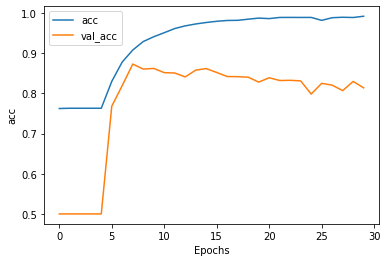

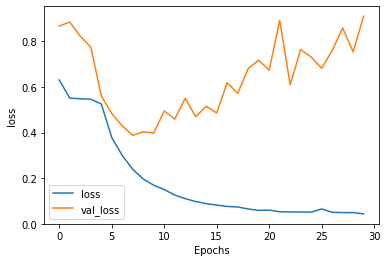

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, setting):
  plt.plot(history.history[setting])
  plt.plot(history.history['val_'+setting])
  plt.xlabel("Epochs")
  plt.ylabel(setting)
  plt.legend([setting, 'val_'+setting])
  plt.show()
  
plot_graphs(history, "acc")
plot_graphs(history, "loss")

USE SHUFFLE DATA


In [ ]:
df = df.sample(frac=1)
df_test = df_test.sample(frac=1)

In [ ]:
dataRaw = df[['review','sentiment']]
train_sentence =dataRaw['review'].to_numpy()
train_labels = dataRaw['sentiment'].to_numpy()

In [ ]:
valid_sentence = df_test['0'].to_numpy()
valid_lables = df_test['1'].to_numpy()


In [ ]:
tokenizer2 = Tokenizer(num_words=vocab_size,filters='"#$%&()*+,-:;<=>[]`{|}~\n',oov_token="<OOV>")
tokenizer2.fit_on_texts(train_sentence)

train_sequences = tokenizer2.texts_to_sequences(train_sentence)
test_sequences = tokenizer2.texts_to_sequences(valid_sentence)

In [ ]:
max_length = 120 
padded_train_sequences2= pad_sequences(train_sequences,
                                      maxlen= max_length,
                                      padding='post',
                                      truncating='post')

padded_valid_sequences2= pad_sequences(test_sequences,
                                      maxlen= max_length,
                                      padding='post',
                                      truncating='post')

In [ ]:
model2 = Sequential()
model2.add(Embedding(vocab_size,32, input_length=max_length))
model2.add(Bidirectional(LSTM(120,return_sequences=True)))
model2.add(Dropout(0.3))
model2.add(LSTM(units=64))
model2.add(Dense(32,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model2.add(Dense(1,activation="sigmoid"))

In [ ]:
model2.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 120, 32)           320000    
_________________________________________________________________
bidirectional_4 (Bidirection (None, 120, 240)          146880    
_________________________________________________________________
dropout_3 (Dropout)          (None, 120, 240)          0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 64)                78080     
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 547,073
Trainable params: 547,073
Non-trainable params: 0
________________________________________________

In [ ]:
expected_acc = 0.95

class MyCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs=()):
    if(logs.get('val_acc') > expected_acc):
      self.model.stop_training =True

callbacks = MyCallback()

In [ ]:
num_epochs = 50

model.compile(loss = 'binary_crossentropy',optimizer='adam',metrics='acc')



history = model.fit(padded_train_sequences2,train_labels, 
          epochs=num_epochs,
          validation_data=(padded_valid_sequences2,valid_lables),
          callbacks=[callbacks])

Epoch 1/500
659/659 [==============================] - 234s 355ms/step - loss: 0.1813 - acc: 0.9341 - val_loss: 0.3760 - val_acc: 0.8544
Epoch 2/500
659/659 [==============================] - 229s 347ms/step - loss: 0.1618 - acc: 0.9427 - val_loss: 0.4305 - val_acc: 0.8404
Epoch 3/500
659/659 [==============================] - 229s 347ms/step - loss: 0.1409 - acc: 0.9506 - val_loss: 0.5782 - val_acc: 0.8123
Epoch 4/500
659/659 [==============================] - 229s 347ms/step - loss: 0.1265 - acc: 0.9570 - val_loss: 0.4469 - val_acc: 0.8447
Epoch 5/500
659/659 [==============================] - 233s 354ms/step - loss: 0.1077 - acc: 0.9661 - val_loss: 0.4866 - val_acc: 0.8469
Epoch 6/500
659/659 [==============================] - 228s 346ms/step - loss: 0.0948 - acc: 0.9704 - val_loss: 0.7101 - val_acc: 0.8056
Epoch 7/500
659/659 [==============================] - 229s 347ms/step - loss: 0.0862 - acc: 0.9743 - val_loss: 0.5742 - val_acc: 0.8415
Epoch 8/500
659/659 [====================

KeyboardInterrupt: ignored

In [ ]:
history.history

{'acc': [0.9223107695579529],
 'loss': [0.20577608048915863],
 'val_acc': [0.8526999950408936],
 'val_loss': [0.4058198928833008]}